<a href="https://colab.research.google.com/github/Ganesh-VG/Statistical-Analysis-of-Marketing-Data/blob/main/Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, we'll get the chance to apply the concepts in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques.

🎯 **Objective**:

The mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Our goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates.

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task

###Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

###Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

### Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

### Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

### Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

##Lets Begin with the solution.

###Import Libraries

In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from collections import Counter
from scipy.stats import binom
from scipy.stats import geom
import math
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import linregress
from datetime import datetime

### Loading the dataset

In [ ]:
# File ID from the shareable link
file_id = '14-F051Lz1oDGVFWbcL6VBbFTXisnSQJJ'
# URL to the file
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'data.csv'
gdown.download(url, output)

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Display the DataFrame
df.head()


Downloading...
From: https://drive.google.com/uc?id=14-F051Lz1oDGVFWbcL6VBbFTXisnSQJJ
To: /content/data.csv
100%|██████████| 184k/184k [00:00<00:00, 10.7MB/s]


Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0           218                  1                4                    4   
1            37                  1                7                    3   
2            30                  1                3                    2   
3             0                  1                1                    0   
4            34                  2                3                    1   

   NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                  6                  1         1         0  
1                  7                  5         1         0  
2                  5                  2         0         0  
3                  2                  7         0         0  
4                  2                  7         1         0  

[5 rows x 22 columns]

### Cleaning and Preprocessing of dataset

- **Datetime Conversion**: Converting `Dt_Customer` into a `datetime` format ensures that date-related operations can be performed efficiently and accurately.
- **Dataset Summary**: Using `df.info()` provides an overview of the dataset, helping to identify the data types, the presence of null values, and confirming successful conversions.
- **Duplicate Identification**: Counting duplicate rows helps in identifying potential data redundancy, which is crucial for ensuring data quality and accuracy in subsequent analysis.

####Converting Dt_Customer into DateTime

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

####Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Number of duplicate data in dataset

In [ ]:
len(df[df.duplicated()])

0

###Handling of null values in dataset

Null values in the dataset were minimal. Missing values in the 'Income' column were imputed with the mean income corresponding to each educational category.

In [ ]:
for edu_cat in df["Education"].unique():
    mean_income = df.loc[df["Education"] == edu_cat, "Income"].mean()
    df.loc[df["Education"] == edu_cat, "Income"] = df.loc[df["Education"] == edu_cat, "Income"].fillna(round(mean_income, 2))

In [ ]:
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

###Mean, median, variance, and standard deviation for each relevant numerical variable.

In this part of the code .describe() method is used to display the central tendency and the measure of dispersion for key variables.

In [ ]:
df[["Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]].describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    52253.592339     0.444196     0.506250    49.109375   303.935714   
std     25039.085599     0.538398     0.544538    28.962453   336.597393   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35538.750000     0.000000     0.000000    24.000000    23.750000   
50%     51609.500000     0.000000     0.000000    49.000000   173.500000   
75%     68289.750000     1.000000     1.000000    74.000000   504.250000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
std       52.167439           1.932238         2.778714             2.923101   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  
count        2240.000000        2240.000000  
mean            5.790179           5.316518  
std             3.250958           2.426645  
min             0.000000           0.000000  
25%             3.000000           3.000000  
50%             5.000000           6.000000  
75%             8.000000           7.000000  
max            13.000000          20.000000

###Identifying and Handling of Outliers

####Outlier Detection using z-score and IQR

The z_score function calculates the Z-score for each element in a numerical array or list (input_z), using a predefined threshold of 2.5 to identify outliers. It returns a list of values from input_z that exceed this threshold.

The iqr_method function utilizes the Interquartile Range (IQR) to identify outliers in a pandas Series or numerical list (input_i). It computes quartiles (Q1 and Q3) and defines outliers as values falling outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]. The function then returns a list of outliers based on this criterion.

In [ ]:
def z_score(input_z):
  threshold = 2.5
  z_score = (input_z - np.mean(input_z)) / np.std(input_z)
  outliers = [input_z[i] for i in range(len(z_score)) if np.abs(z_score[i]) > threshold]
  return outliers

def iqr_method(input_i):
  Q1 = input_i.quantile(0.25)
  Q3 = input_i.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in input_i if (x < lower_bound) | (x > upper_bound)]
  # winsorize(input_i, limits=[0.05, 0.05])
  return outliers

####Outlier detection for each column

In [ ]:
columns_of_interest = ["Year_Birth", "Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",  "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

for each_col in columns_of_interest:
  z_scores_data = z_score(df[each_col])
  print(f"Number of z_score outliers {each_col}", len(z_scores_data))
  iqr_data = iqr_method(df[each_col])
  print(f"Number of iqr outliers {each_col}", len(iqr_data))

Number of z_score outliers Year_Birth 3
Number of iqr outliers Year_Birth 3
Number of z_score outliers Income 8
Number of iqr outliers Income 8
Number of z_score outliers Recency 0
Number of iqr outliers Recency 0
Number of z_score outliers MntWines 59
Number of iqr outliers MntWines 35
Number of z_score outliers MntFruits 109
Number of iqr outliers MntFruits 227
Number of z_score outliers MntMeatProducts 90
Number of iqr outliers MntMeatProducts 175
Number of z_score outliers MntFishProducts 102
Number of iqr outliers MntFishProducts 223
Number of z_score outliers MntSweetProducts 105
Number of iqr outliers MntSweetProducts 248
Number of z_score outliers MntGoldProds 89
Number of iqr outliers MntGoldProds 207
Number of z_score outliers NumDealsPurchases 46
Number of iqr outliers NumDealsPurchases 86
Number of z_score outliers NumWebPurchases 4
Number of iqr outliers NumWebPurchases 4
Number of z_score outliers NumCatalogPurchases 71
Number of iqr outliers NumCatalogPurchases 23
Number

####Outlier treatment for each column

The code snippet performs winsorization on specific columns of a DataFrame df to limit outliers. It uses predefined functions winsor_one with limits to adjust values beyond certain percentiles, ensuring the data is more robust for statistical analysis or modeling tasks.

For example:

winsor_one(win): Winsorizes the input win with limits [0.05, 0.05]. This means it replaces values below the 5th percentile with the value at the 5th percentile and values above the 95th percentile with the value at the 95th percentile.

In [ ]:
def winsor_one(win):
    return winsorize(win, limits=[0.05, 0.05])

# Correct list of columns without duplicates
vinsor_cat = ["Year_Birth", "Income", "Recency", "MntWines", "NumDealsPurchases",
              "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",
              "NumWebVisitsMonth", "MntFruits", "MntMeatProducts",
              "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Apply the winsor_one function to the selected columns
df[vinsor_cat] = df[vinsor_cat].apply(winsor_one)


###Column transformation

In [ ]:
# Column "MntTotal" gives the total money spent by a customer on all purchaces made at store.
df["MntTotal"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# Column "NumPurchasesTotal" gives the total number of purchases made by customer at store.
df["NumPurchasesTotal"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

# Column "CustomerAge" gives the age of the customer
df["CustomerAge"] = datetime.now().year - df["Year_Birth"]

# Column "customerTenure" gives number of days since the customer made first purchase at store.
df["customerTenure"] = (datetime.now() - df["Dt_Customer"]).dt.days

###Probability Mass Function

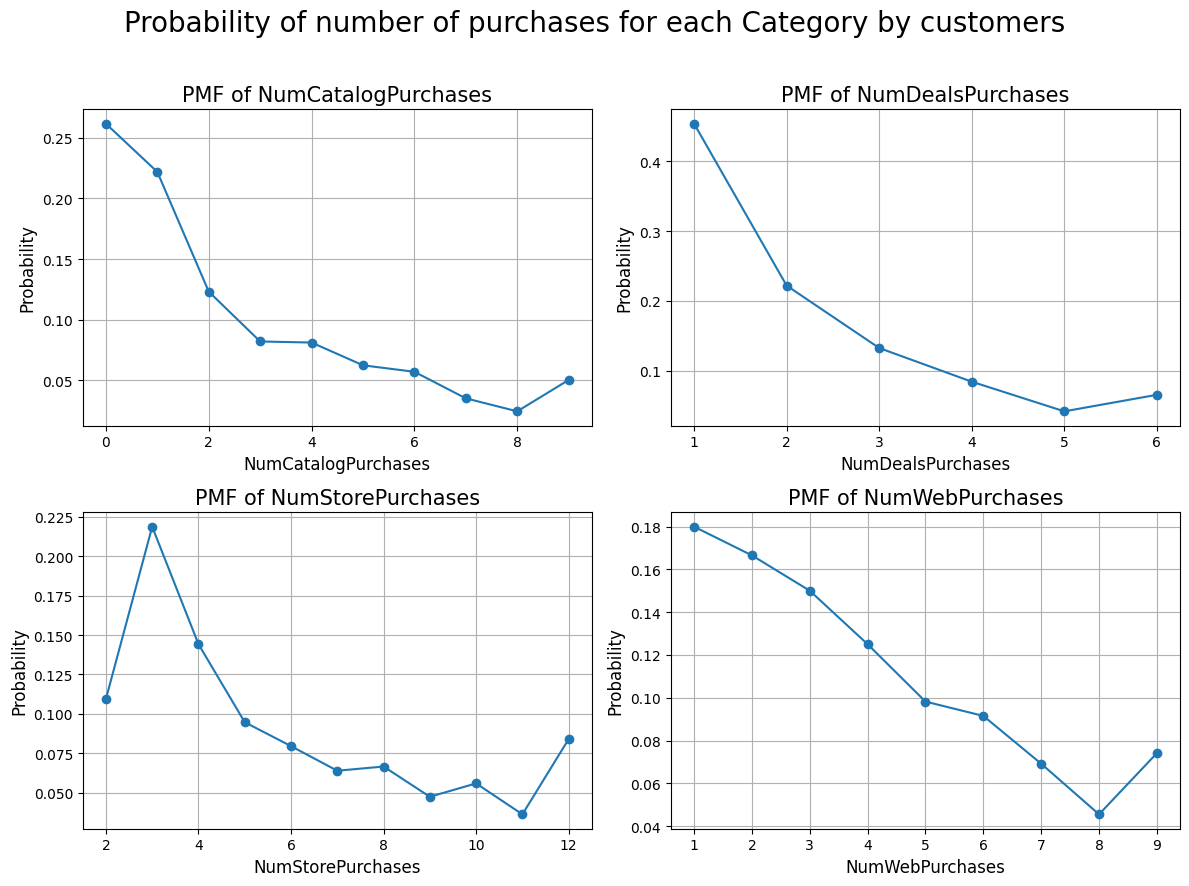

In [ ]:
rolls = ["NumDealsPurchases", "NumWebPurchases",
         "NumCatalogPurchases", "NumStorePurchases"]
pmf_rolls = {}

# Calculate the PMF
for each_roll in rolls:
    pmf = Counter(df[each_roll])
    total_rolls = len(df[each_roll])
    for outcome, count in pmf.items():
        pmf[outcome] = count / total_rolls
    pmf_rolls[each_roll] = dict(sorted(pmf.items()))  # Sort the PMF by key

# Sort the dictionary 'pmf_rolls' by key
pmf_rolls = dict(sorted(pmf_rolls.items()))

# Plotting the PMFs in a 4x3 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
fig.suptitle('Probability of number of purchases for each Category by customers', fontsize=20)

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, (each_roll, pmf) in enumerate(pmf_rolls.items()):
    axs[i].plot(list(pmf.keys()), list(pmf.values()), marker='o')
    axs[i].set_title(f'PMF of {each_roll}', fontsize=15)
    axs[i].set_xlabel(each_roll, fontsize=12)
    axs[i].set_ylabel('Probability', fontsize=12)
    axs[i].grid(True)

# Hide any unused subplots
for j in range(len(pmf_rolls), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

1. **PMF of Number of Catalog Purchases**:
   - **Description**: This graph shows the probability of customers making a certain number of catalog purchases.
   - **Observation**: The highest probability is at 0 purchases (around 0.25), indicating that a significant portion of customers do not make any catalog purchases. The probability decreases as the number of purchases increases, with some slight variations at higher purchase numbers.

2. **PMF of Number of Deals Purchases**:
   - **Description**: This graph depicts the probability of customers making purchases based on deals and discounts.
   - **Observation**: The highest probability is at 1 purchase (over 0.4), indicating that most customers make only one deal-based purchase. The probability declines rapidly with an increasing number of deal purchases, becoming quite low by 6 purchases.

3. **PMF of Number of Store Purchases**:
   - **Description**: This graph shows the probability distribution for the number of store purchases by customers.
   - **Observation**: The highest probability is at 2 purchases (around 0.22), suggesting many customers make a couple of store purchases. The probability then decreases, with small peaks at 4 and 12 purchases, showing some variability in store purchasing behavior.

4. **PMF of Number of Web Purchases**:
   - **Description**: This graph presents the probability of customers making web purchases.
   - **Observation**: The highest probability is at 1 purchase (around 0.18), with a steady decline as the number of web purchases increases. There is a slight increase at 9 purchases, indicating a small subset of customers with frequent web purchases.

###Cumulative Distribution Function

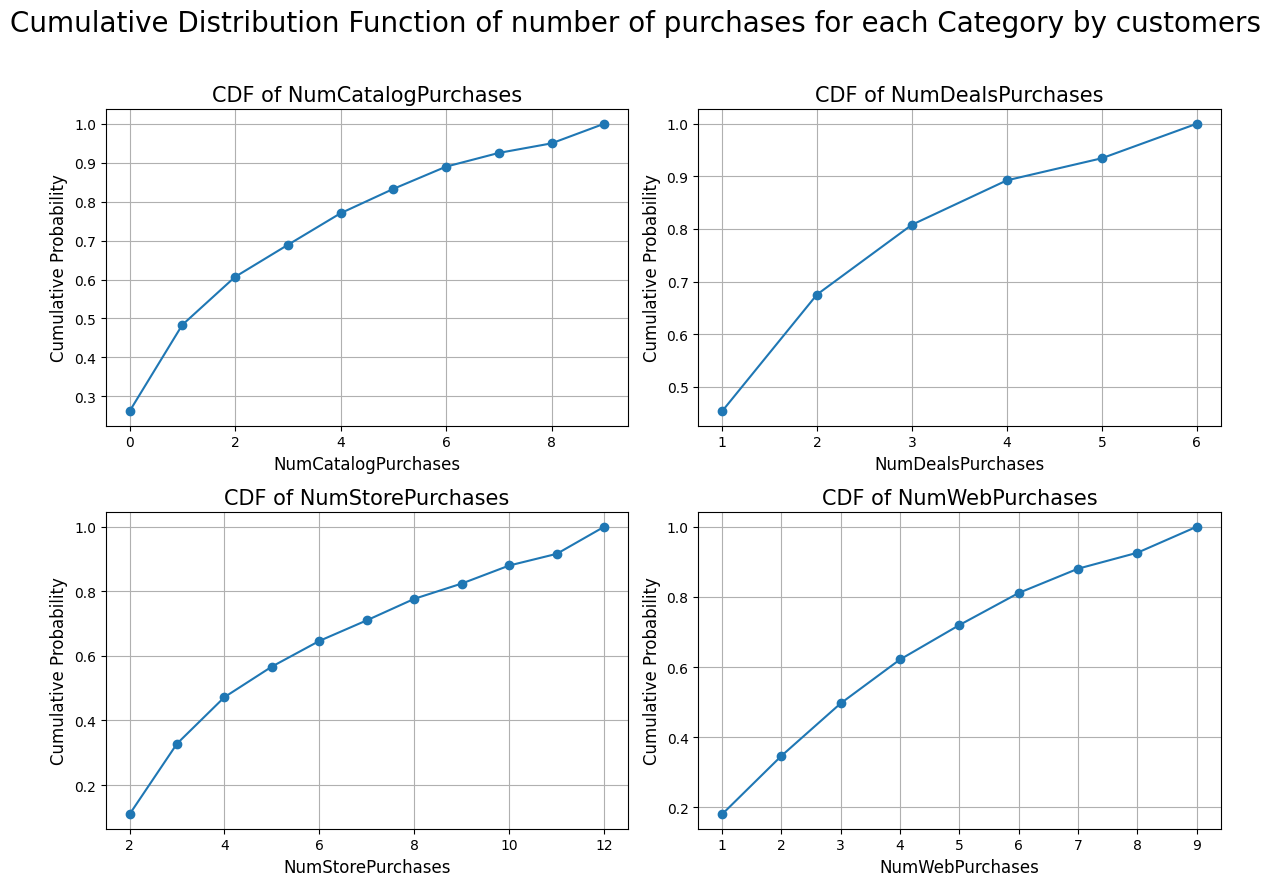

In [ ]:
rolls = ["NumDealsPurchases", "NumWebPurchases",
         "NumCatalogPurchases", "NumStorePurchases"]
cdf_rolls = {}

# Calculate the CDF
for each_roll in rolls:
    pmf = Counter(df[each_roll])
    total_rolls = len(df[each_roll])
    cdf = {}
    cumulative_prob = 0
    for outcome, count in sorted(pmf.items()):  # Sort the PMF by key
        prob = count / total_rolls
        cumulative_prob += prob
        cdf[outcome] = cumulative_prob
    cdf_rolls[each_roll] = cdf

# Sort the dictionary 'cdf_rolls' by key
cdf_rolls = dict(sorted(cdf_rolls.items()))

# Plotting the CDFs in a 2x2 grid
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
fig.suptitle('Cumulative Distribution Function of number of purchases for each Category by customers', fontsize=20)

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, (each_roll, cdf) in enumerate(cdf_rolls.items()):
    axs[i].plot(list(cdf.keys()), list(cdf.values()), marker='o')
    axs[i].set_title(f'CDF of {each_roll}', fontsize=15)
    axs[i].set_xlabel(each_roll, fontsize=12)
    axs[i].set_ylabel('Cumulative Probability', fontsize=12)
    axs[i].grid(True)

# Hide any unused subplots
for j in range(len(cdf_rolls), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

1. **CDF of Number of Catalog Purchases**:
   - **Description**: This graph shows the cumulative probability of customers making a certain number of catalog purchases.
   - **Observation**: The CDF starts at around 0.3 for 0 purchases and increases steadily, reaching nearly 1 by 8 purchases. This indicates that about 30% of customers make no catalog purchases, and almost all customers make at most 8 catalog purchases.

2. **CDF of Number of Deals Purchases**:
   - **Description**: This graph shows the cumulative probability of customers making purchases based on deals.
   - **Observation**: Starting at 0.5 for 1 purchase, the CDF rises smoothly, approaching 1 by 6 purchases. This suggests that 50% of customers make only one deal-based purchase, and nearly all customers make up to 6 deal purchases.

3. **CDF of Number of Store Purchases**:
   - **Description**: This graph shows the cumulative probability of customers making store purchases.
   - **Observation**: The CDF begins at around 0.2 for 2 purchases and increases gradually, reaching nearly 1 by 12 purchases. This indicates that 20% of customers make 2 store purchases, and almost all customers make up to 12 store purchases.

4. **CDF of Number of Web Purchases**:
   - **Description**: This graph shows the cumulative probability of customers making web purchases.
   - **Observation**: Starting at 0.2 for 1 purchase, the CDF steadily climbs to nearly 1 by 9 purchases. This suggests that 20% of customers make 1 web purchase, and nearly all customers make up to 9 web purchases.

###Binomial Distribution

####Probability of receiving positive response.

In [ ]:
rolls = ["Response", "Complain"]
pmf_rolls = {}

# Calculate the PMF
for each_roll in rolls:
    pmf = Counter(df[each_roll])
    total_rolls = len(df[each_roll])
    for outcome, count in pmf.items():
        pmf[outcome] = count / total_rolls
    pmf_rolls[each_roll] = dict(sorted(pmf.items()))

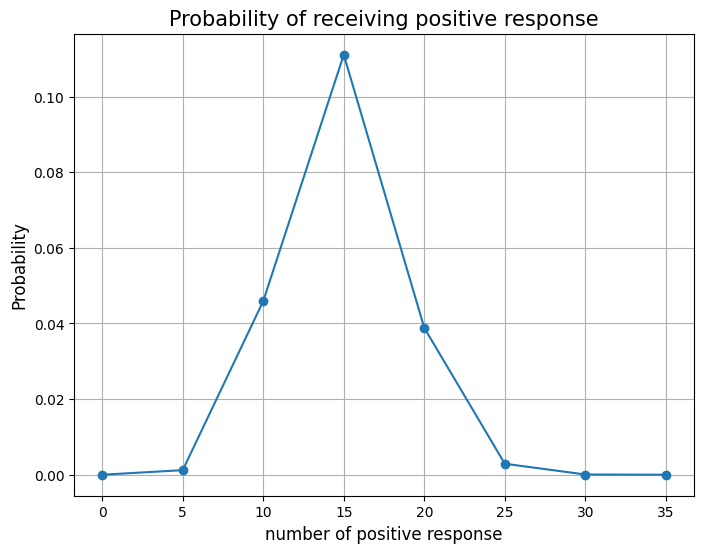

In [ ]:
n_response = 100
p_response = pmf_rolls["Response"][1]

people_response = range (0, 40, 5)
response_prob = []

for each_response in people_response:
  prob_response = binom.pmf(each_response, n_response, p_response)
  response_prob.append(prob_response)

plt.figure(figsize=(8, 6))
plt.plot(people_response, response_prob, marker='o')
plt.title(f'Probability of receiving positive response', fontsize=15)
plt.xlabel('number of positive response', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True)

   - **Description**: This graph shows the probability of getting certain number of positive response from 100 customers visiting the store.
   - **Observation**: This graph clearly shows that there is nearly zero chances of getting positive response from 0, 5, 25,30, 35 people out of 100 people.but there is great chance of getting positive response from 15 people out of 100 and little less probability of getting 10 or 25 positive responses.

####Probability of receiving Complaints.

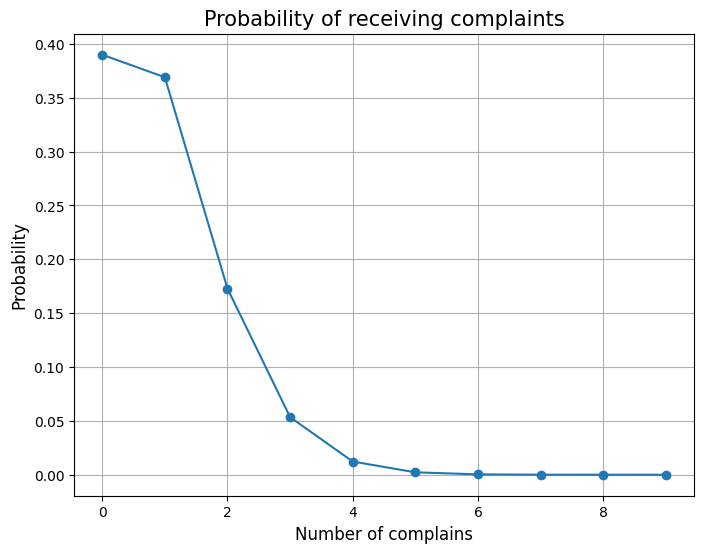

In [ ]:
n_complain = 100
p_complain = pmf_rolls["Complain"][1]

people_complaint = range(0,10)
complain_prob = []

for each_person in people_complaint:
  prob_complain = binom.pmf(each_person, n_complain, p_complain)
  complain_prob.append(prob_complain)


plt.figure(figsize=(8, 6))
plt.plot(people_complaint, complain_prob, marker='o')
plt.title(f'Probability of receiving complaints', fontsize=15)
plt.xlabel('Number of complains', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True)

   - **Description**: This graph shows the probability of getting certain number of complaints from 100 customers visiting the store.
   - **Observation**: The graph shows that there is highest chance of getting 0 complaints out of 100 customers and it reduces there on. This shows the service by the store is of top class.

###Poisson Distribution

These graphs suggest that for all product categories, the most likely scenario is a small percentage change in purchases, either positive or negative. The distributions are symmetric and centered around 0%, indicating that significant changes in purchasing behavior are less probable.

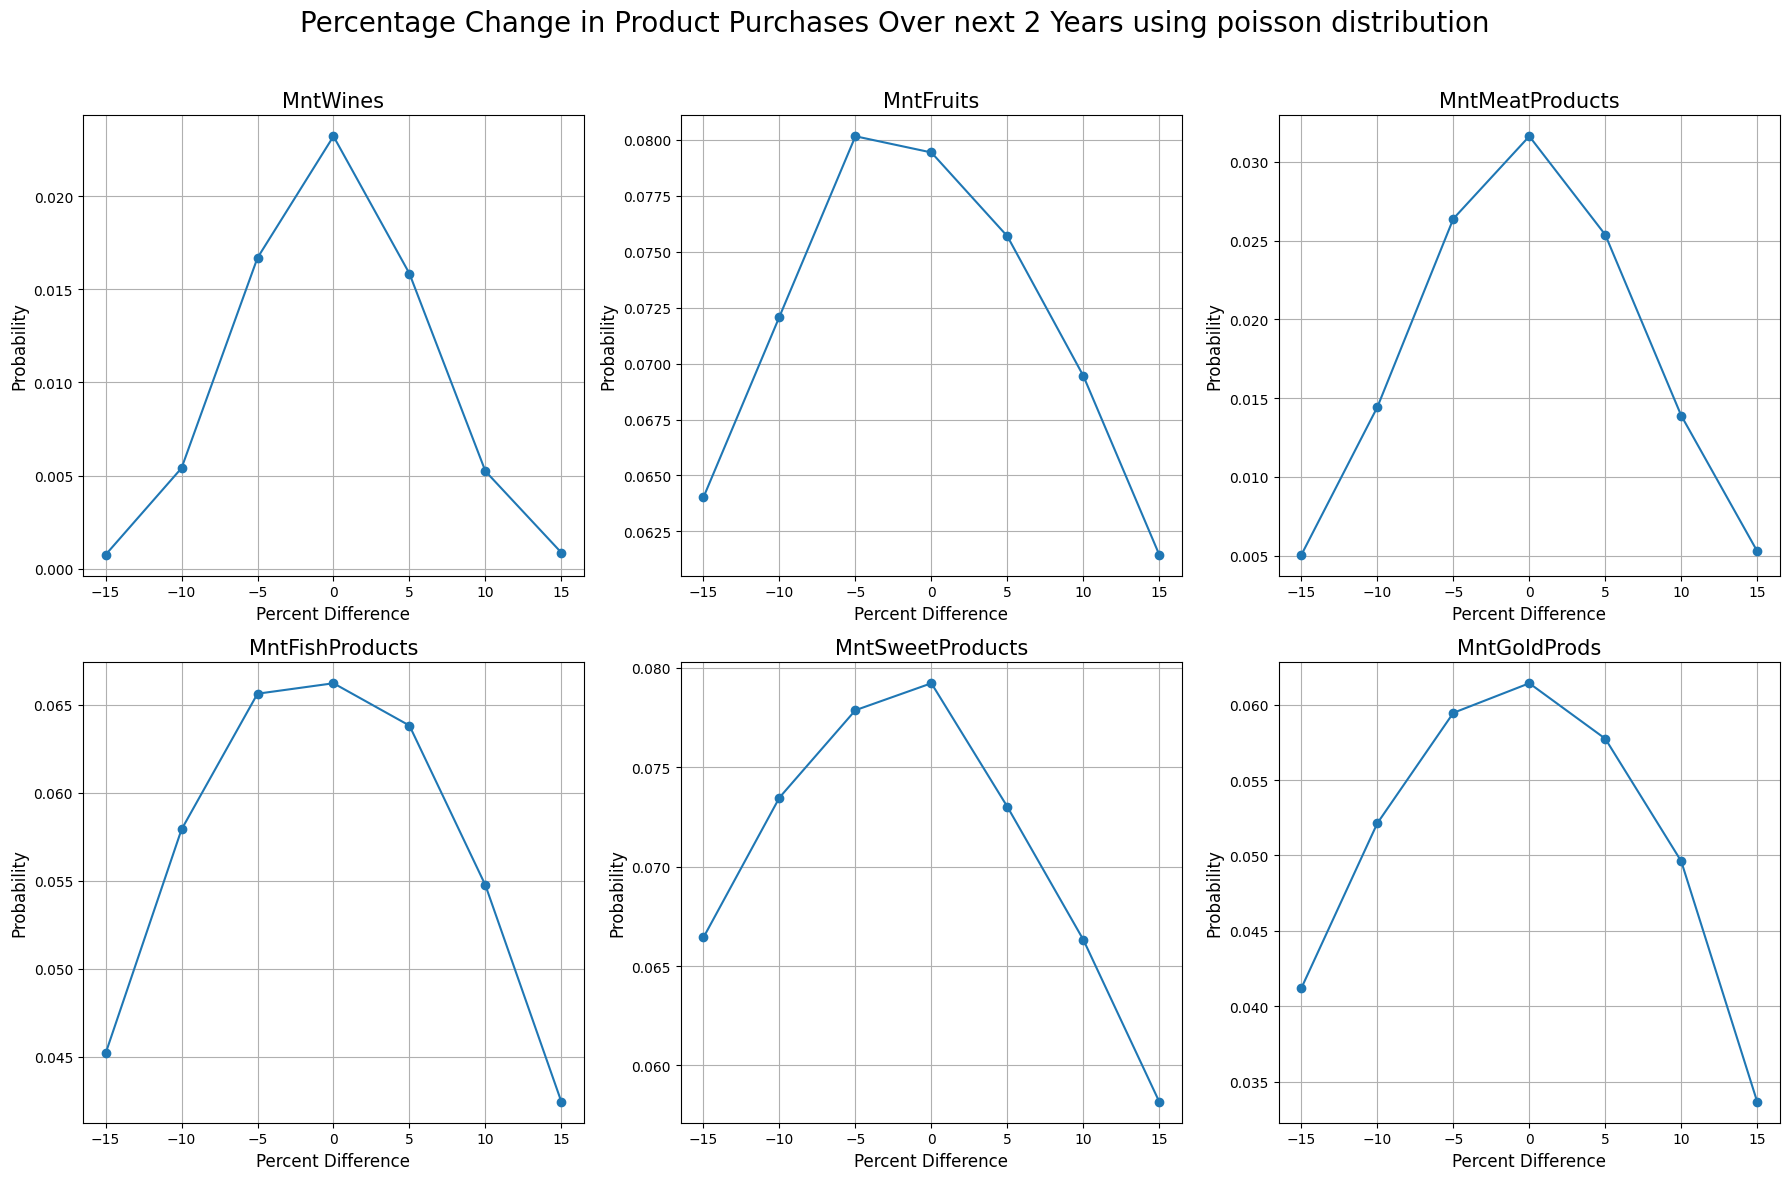

In [ ]:
product_buy = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds"]
percent_diff = [-15, -10, -5, 0, 5, 10, 15]

# Plotting
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Percentage Change in Product Purchases Over next 2 Years using poisson distribution', fontsize=20)

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, each_product in enumerate(product_buy):
    average_buy = np.mean(df[each_product])

    probabilities = []
    for each_percent in percent_diff:
        people_recency = round(average_buy * ((100 + each_percent) / 100))
        pmf = poisson.pmf(people_recency, average_buy)
        probabilities.append(pmf)

    axs[i].plot(percent_diff, probabilities, marker='o')
    axs[i].set_title(f'{each_product}',fontsize=15)
    axs[i].set_xlabel('Percent Difference', fontsize=12)
    axs[i].set_ylabel('Probability', fontsize=12)
    axs[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()

1. **Money spent on Wines**:
   - **Description**: This graph shows the probability distribution of the percentage change in wine purchases over the next two years.
   - **Observation**: The highest probability of nearly 2% is around 0% change, indicating that wine purchases are most likely to remain stable. The probability decreases symmetrically as the percentage change moves away from 0%.

2. **Money spent on Fruits**:
   - **Description**: This graph displays the probability distribution of the percentage change in fruit purchases over the next two years.
   - **Observation**: The highest probability of 8% is -5% change, suggesting a slight decrease in fruit purchases is most likely. The distribution shows a sharp peak and decreases symmetrically towards larger percentage changes.

3. **Money spent on Meat Products**:
   - **Description**: This graph shows the probability distribution of the percentage change in meat product purchases over the next two years.
   - **Observation**: The highest probability nearly 3% is at 0% change, indicating that meat purchases are likely to stay the same. The probability decreases symmetrically for both increases and decreases in purchases.

4. **Money spent on Fish Products**:
   - **Description**: This graph displays the probability distribution of the percentage change in fish product purchases over the next two years.
   - **Observation**: The highest probability is slightly below 0% change, suggesting a small decrease in fish purchases is most likely. The distribution is relatively symmetric around the peak.

5. **Money spent on Sweet Products**:
   - **Description**: This graph shows the probability distribution of the percentage change in sweet product purchases over the next two years.
   - **Observation**: The highest probability is around 0% change, indicating that sweet purchases are expected to remain stable. The distribution is symmetric, with probabilities decreasing for larger percentage changes.

6. **Money spent on Gold Prods**:
   - **Description**: This graph displays the probability distribution of the percentage change in gold product purchases over the next two years.
   - **Observation**: The highest probability is around 0% change, suggesting that gold product purchases are likely to stay stable. The probability decreases symmetrically for both increases and decreases in purchases.

####Poissons distribution for Number of website visits

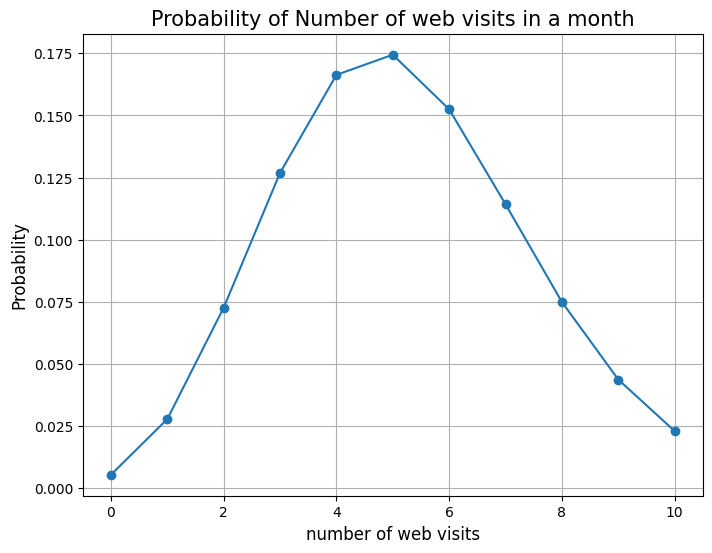

In [ ]:
avg_NumWebVisitsMonth = np.mean(df["NumWebVisitsMonth"])

prob_NumWebVisitsMonth = range(0, 11)
prob_NumWebVisitsMonth_lst = []

for each_webvisit in prob_NumWebVisitsMonth:
  pmf = poisson.pmf(each_webvisit, avg_NumWebVisitsMonth)
  prob_NumWebVisitsMonth_lst.append(pmf)

plt.figure(figsize=(8, 6))
plt.plot(prob_NumWebVisitsMonth, prob_NumWebVisitsMonth_lst, marker='o')
plt.title(f'Probability of Number of web visits in a month', fontsize=15)
plt.xlabel('number of web visits', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True)

   - **Description**: This graph shows the probability  of number of web visits by customer in a month.
   - **Observation**: The graph shows that there is highest 17.5% chance of getting 5 web visits by a customer in a month. Which decreases symmetrically on both side of highest probability.

###Geometric Distribution

####Probability of receiving first Positive Response

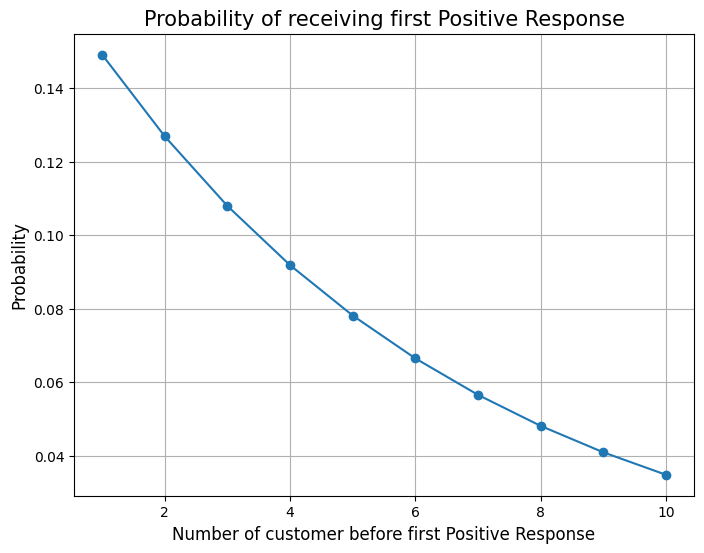

In [ ]:
# Probability of success on each trial
p_response = pmf_rolls["Response"][1]

# Number of trials until the first success
k_response = range(1,11)
geom_prob_response = []

# Calculate the probability using scipy.stats.geom
for geom_trial in k_response:
  probability_response = geom.pmf(geom_trial, p_response)
  geom_prob_response.append(probability_response)

plt.figure(figsize=(8, 6))
plt.plot(k_response, geom_prob_response, marker='o')
plt.title('Probability of receiving first Positive Response', fontsize=15)
plt.xlabel('Number of customer before first Positive Response', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True)

   - **Description**: This graph shows the probability  of receiving first positive response by 'n'th customer.
   - **Observation**: The graph shows that there is highest 15% chance of getting first positive reply by first customer itself. This shows that superstore have given highest priority to customer service than any other thing.

####Probability of receiving first Complain

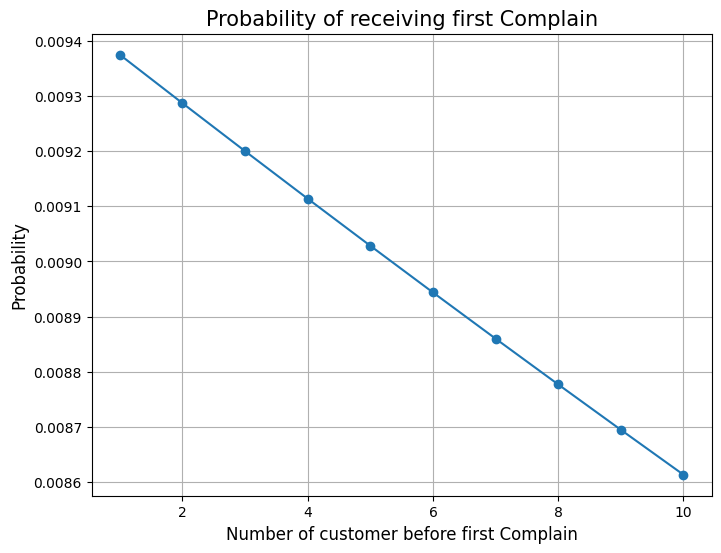

In [ ]:
# Probability of success on each trial
p_complain = pmf_rolls["Complain"][1]

# Number of trials until the first success
k_complain = range(1,11)
geom_prob_complain = []

# Calculate the probability using scipy.stats.geom
for geom_trial in k_complain:
  probability_complain = geom.pmf(geom_trial, p_complain)
  geom_prob_complain.append(probability_complain)

plt.figure(figsize=(8, 6))
plt.plot(k_complain, geom_prob_complain, marker='o')
plt.title('Probability of receiving first Complain', fontsize=15)
plt.xlabel('Number of customer before first Complain', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True)

   - **Description**: This graph shows the probability  of receiving first complain by 'n'th customer.
   - **Observation**: The graph shows that there is highest 0.94% chance of getting first positive reply by first customer. The chances reduce there by. The overall probability of getting complain itself is too low due to best customer service provided.

###Exponential Distribution

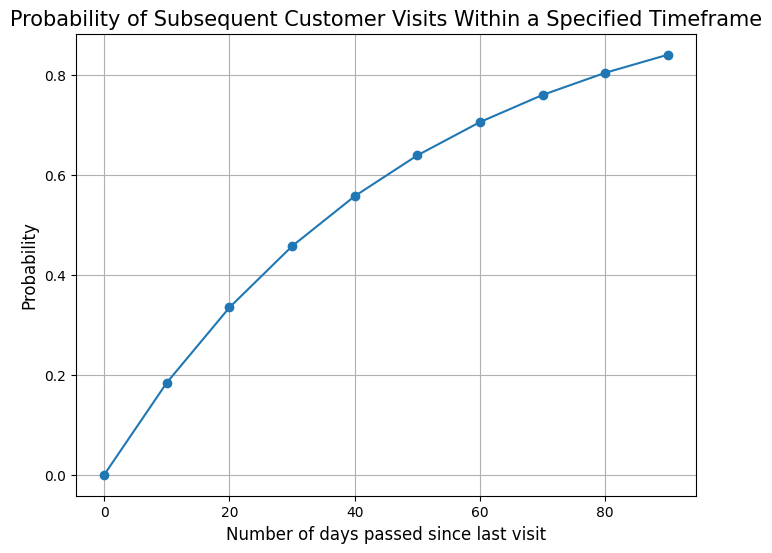

In [ ]:
beta = np.mean(df["Recency"]) # Mean time per event (days)
time_period = range(0,100,10)  # Time period within which we want to find the probability
prob_time_period_cdf = []

# Calculate the probability
for each_period in time_period:
  probability_pdf = expon.cdf(each_period, scale=beta)
  prob_time_period_cdf.append(probability_pdf)

plt.figure(figsize=(8, 6))
plt.plot(time_period, prob_time_period_cdf, marker='o')
plt.title('Probability of Subsequent Customer Visits Within a Specified Timeframe', fontsize=15)
plt.xlabel('Number of days passed since last visit', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True)

   - **Description**: This graph shows the probability  of Subsequent Customer Visits Within a Specified Timeframe.
   - **Observation**: The graph shows that there is highest 80% chance of customer visiting the store in last 80 days gradually dcreasing as the number of days increases.

###Joint Distribution

####How does money spent by Customer varries with Customer Income, Customer Age and Customer Tenure?

Covariance of Income with money spent on purchase at store: 9184886.438377
Correlation of Income with money spent on purchase at store: 0.8299554192879547
Covariance of CustomerAge with money spent on purchase at store: 780.4750685892936
Correlation of CustomerAge with money spent on purchase at store: 0.12336850369239327
Covariance of customerTenure with money spent on purchase at store: 17976.944014786575
Correlation of customerTenure with money spent on purchase at store: 0.13738885662258185


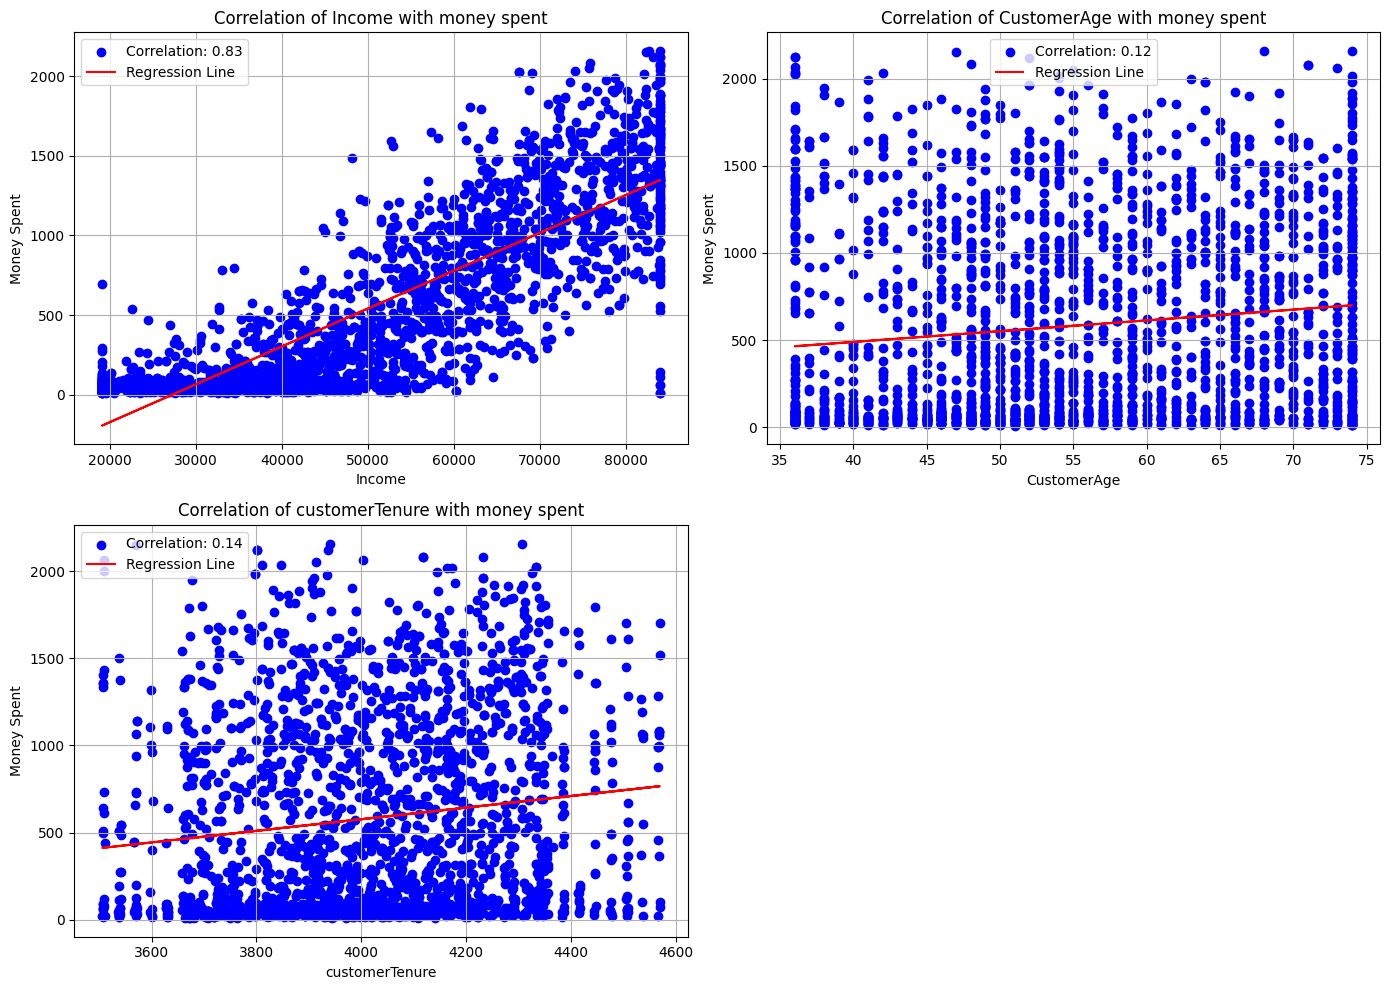

In [ ]:
test_sample = ["Income", "CustomerAge", "customerTenure"]

# Define number of subplots
num_plots = len(test_sample)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 10))
axs = axs.flatten()

for i, each_sample in enumerate(test_sample):
    X = df[each_sample]
    Y = df["MntTotal"]

    # Calculate covariance
    covariance = np.cov(X, Y)[0][1]

    # Calculate correlation
    correlation = np.corrcoef(X, Y)[0][1]

    print(f"Covariance of {each_sample} with money spent on purchase at store:", covariance)
    print(f"Correlation of {each_sample} with money spent on purchase at store:", correlation)

    # Fit a linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(X, Y)
    line = slope * X + intercept

    # Plotting
    axs[i].scatter(X, Y, label=f'Correlation: {correlation:.2f}', color='b')
    axs[i].plot(X, line, color='r', label='Regression Line')
    axs[i].set_title(f'Correlation of {each_sample} with money spent', fontsize=12)
    axs[i].set_xlabel(each_sample, fontsize=10)
    axs[i].set_ylabel('Money Spent', fontsize=10)
    axs[i].legend()
    axs[i].grid(True)

# Hide any extra subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

1. **Income with money spent**:
   - **Description**: This graph shows the correalation of income with money spent.
   - **Observation**: The income is directly correlated with the money spent by the customer with correlation value of 0.83. As the income of the customer increases his spending increases.

2. **Customer age with money spent**:
   - **Description**: This graph shows the correalation of customer age with money spent.
   - **Observation**: There is not much variation but they tend to spend little more when age of the customer is high.

3. **Customer tenure with money spent**:
   - **Description**: This graph shows the correalation of for how long a person is our customer with money spent by him.
   - **Observation**: Older customers tend to purchase slightly more than new customers.

####How does number of purchases made by Customer varries with Customer Income, Customer Age and Customer Tenure?

Covariance of Income with Number of purchases made at store at store: 106666.12728742903
Correlation of Income with Number of purchases made at store at store: 0.7845727010908831
Covariance of CustomerAge with Number of purchases made at store at store: 13.63190678236457
Correlation of CustomerAge with Number of purchases made at store at store: 0.17539918127604673
Covariance of customerTenure with Number of purchases made at store at store: 239.85889327984432
Correlation of customerTenure with Number of purchases made at store at store: 0.14921660694944408


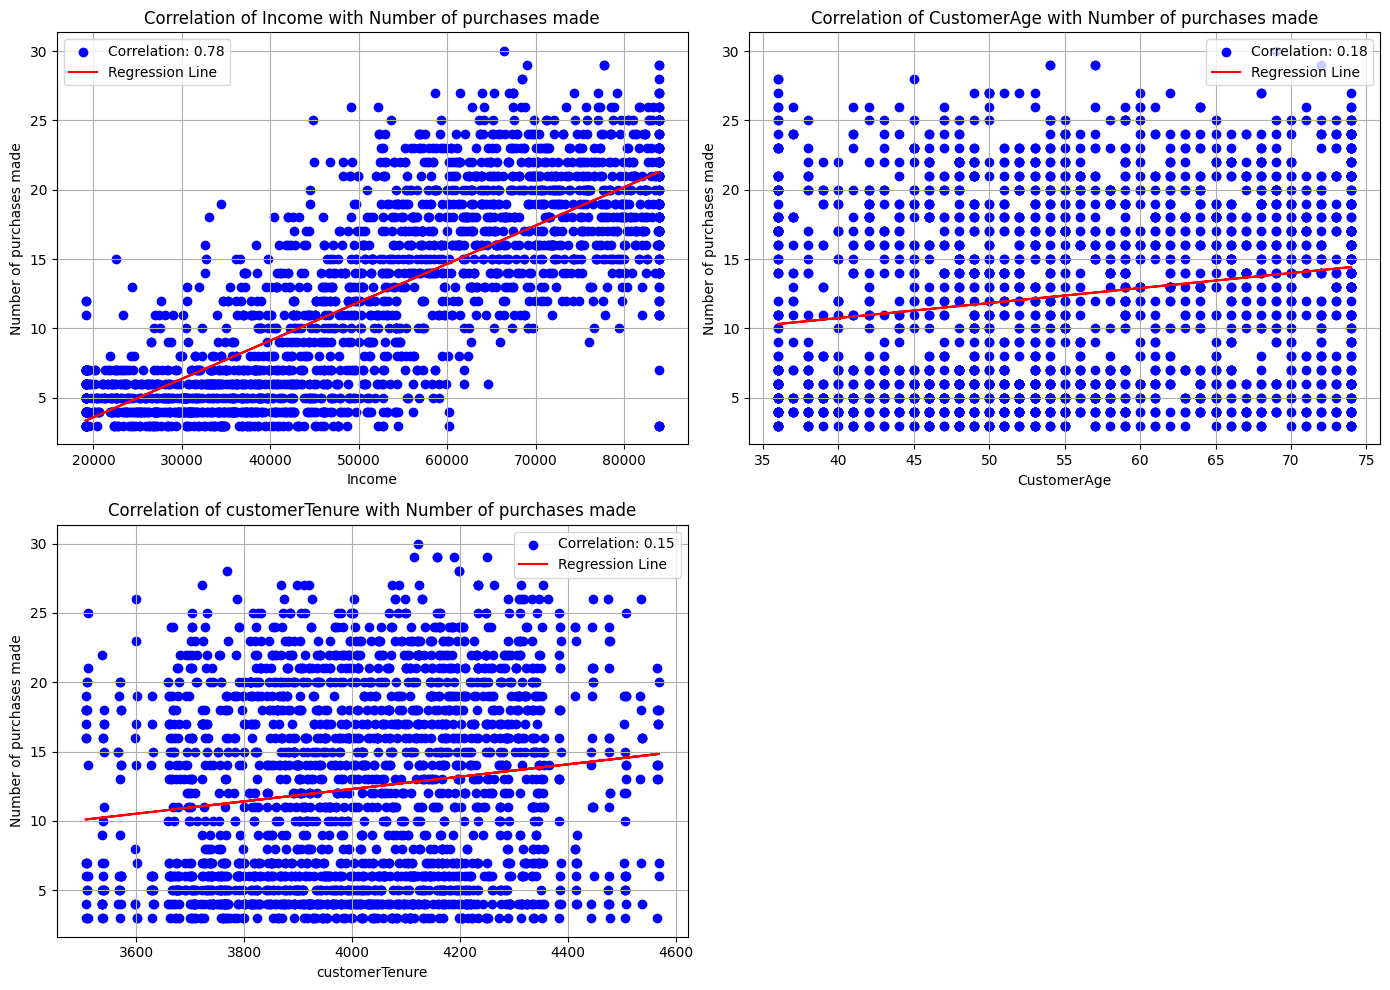

In [ ]:
test_sample = ["Income", "CustomerAge", "customerTenure"]

# Define number of subplots
num_plots = len(test_sample)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 10))
axs = axs.flatten()

for i, each_sample in enumerate(test_sample):
    X = df[each_sample]
    Y = df["NumPurchasesTotal"]

    # Calculate covariance
    covariance = np.cov(X, Y)[0][1]

    # Calculate correlation
    correlation = np.corrcoef(X, Y)[0][1]

    print(f"Covariance of {each_sample} with Number of purchases made at store at store:", covariance)
    print(f"Correlation of {each_sample} with Number of purchases made at store at store:", correlation)

    # Fit a linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(X, Y)
    line = slope * X + intercept

    # Plotting
    axs[i].scatter(X, Y, label=f'Correlation: {correlation:.2f}', color='b')
    axs[i].plot(X, line, color='r', label='Regression Line')
    axs[i].set_title(f'Correlation of {each_sample} with Number of purchases made', fontsize=12)
    axs[i].set_xlabel(each_sample, fontsize=10)
    axs[i].set_ylabel('Number of purchases made', fontsize=10)
    axs[i].legend()
    axs[i].grid(True)

# Hide any extra subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

1. **Income with money spent**:
   - **Description**: This graph shows the correalation of income with Number of purchases made.
   - **Observation**: The income is directly correlated with the money spent by the customer with correlation value of 0.78. As the income of the customer increases his total purchases increases.

2. **Customer age with money spent**:
   - **Description**: This graph shows the correalation of customer age with Number of purchases made.
   - **Observation**: There is not much variation but they tend to make little more purchases when age of the customer is high.

3. **Customer tenure with money spent**:
   - **Description**: This graph shows the correalation of for how long a person is our customer with Number of purchases made by him.
   - **Observation**: Older customers tend to purchase slightly more than new customers.

####Whether more web visits turn into more web purchases?

Covariance of number of web visits made per month with number of purchases: -0.21538912460920054
Correlation of number of web visits made per month with number of purchases: -0.03898806327305987


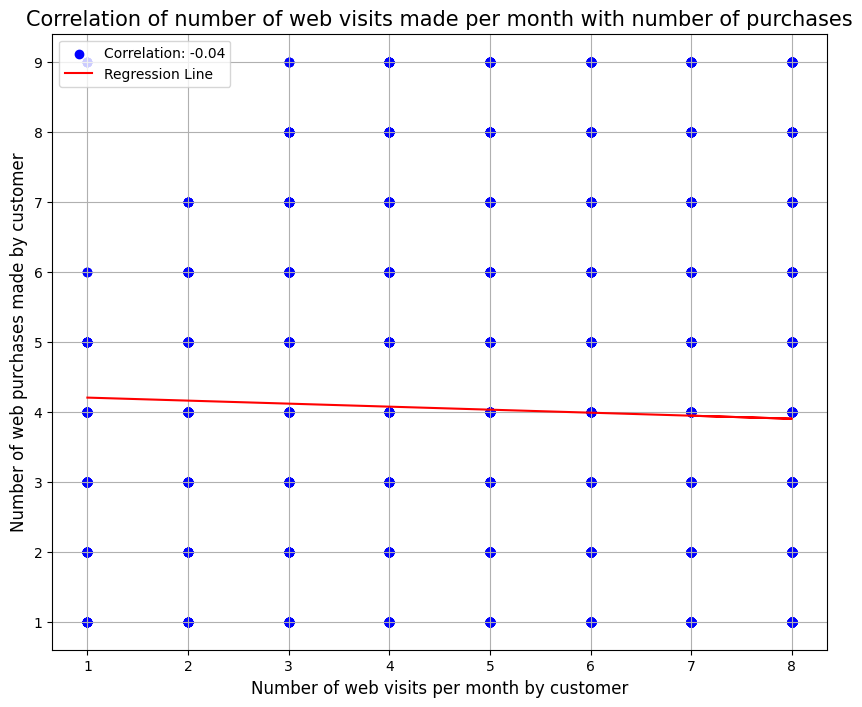

In [ ]:
# Sample data (replace with your actual data)
X = df["NumWebVisitsMonth"]
Y = df["NumWebPurchases"]
# Calculate covariance
covariance = np.cov(X, Y)[0][1]
# Calculate correlation
correlation = np.corrcoef(X, Y)[0][1]
print("Covariance of number of web visits made per month with number of purchases:", covariance)
print("Correlation of number of web visits made per month with number of purchases:", correlation)

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
line = slope * X + intercept

# Plotting
plt.figure(figsize=(10, 8))

plt.scatter(X, Y, label=f'Correlation: {correlation:.2f}', color='b')
plt.plot(X, line, color='r', label='Regression Line')

plt.title('Correlation of number of web visits made per month with number of purchases', fontsize=15)
plt.xlabel('Number of web visits per month by customer', fontsize=12)
plt.ylabel('Number of web purchases made by customer', fontsize=12)
plt.legend()

plt.grid(True)
plt.show()

   - **Description**: This graph shows the correalation of number of web visits made per month with number of purchases.
   - **Observation**: The graph shows that the increase in number of web visits by customer does'nt really turn into increase number of web purchases by customer.

###Average money spent by different category of people

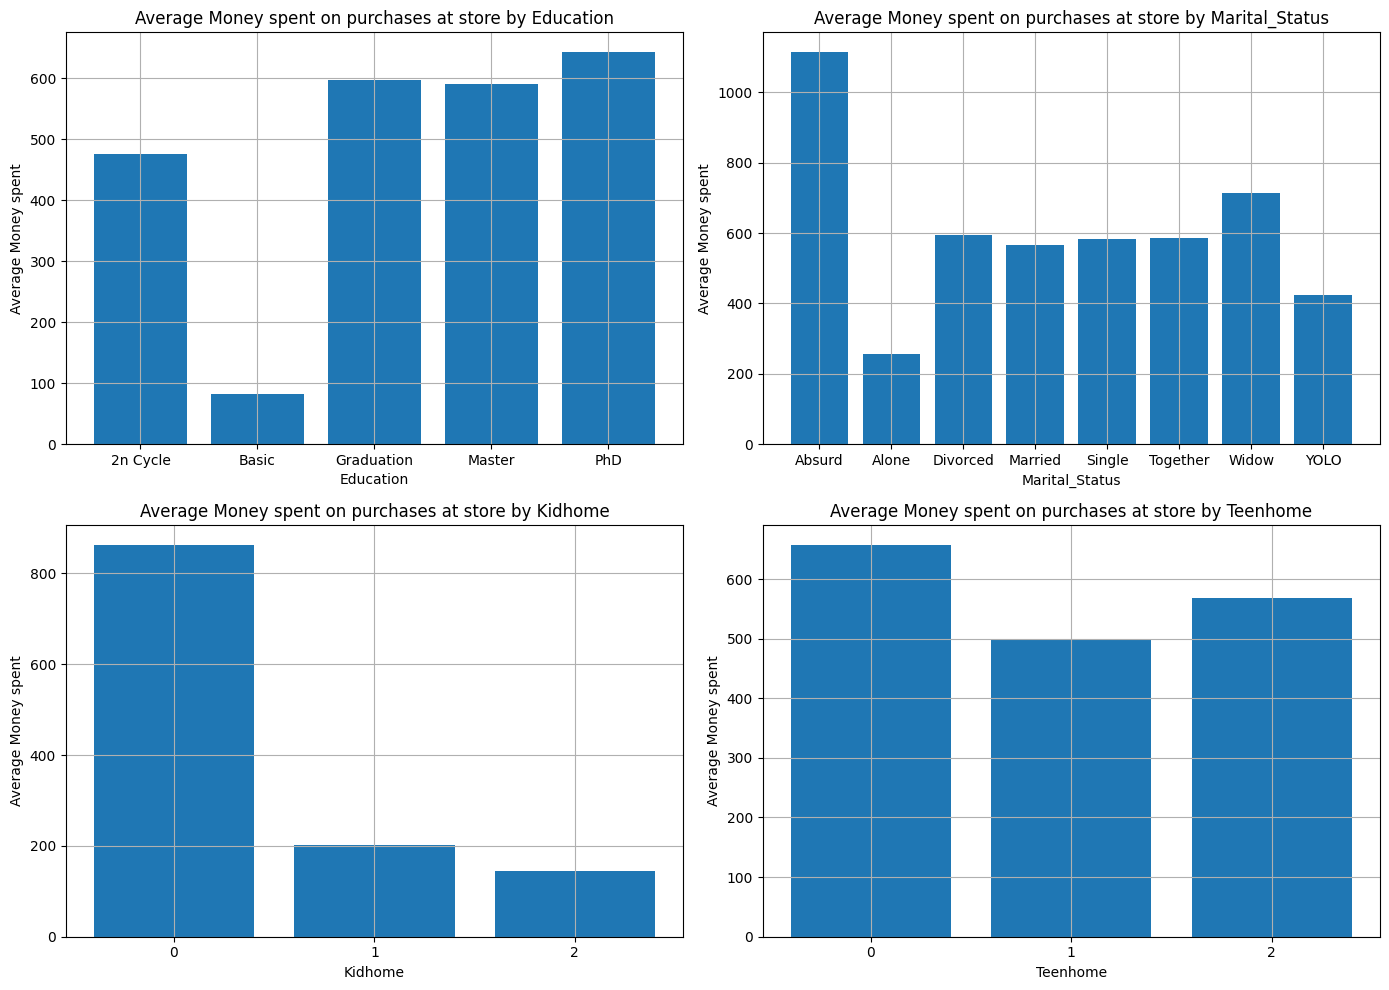

In [ ]:
categories = ["Education", "Marital_Status", "Kidhome", "Teenhome"]

# Define number of subplots
num_plots = len(categories)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 10))
axs = axs.flatten()

for i, category in enumerate(categories):
    means = df.groupby(category)['MntTotal'].mean()

    axs[i].bar(means.index.astype(str), means.values)
    axs[i].set_title(f'Average Money spent on purchases at store by {category}', fontsize=12)
    axs[i].set_xlabel(category, fontsize=10)
    axs[i].set_ylabel('Average Money spent', fontsize=10)
    axs[i].grid(True)

# Hide any extra subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

1. **Money spent on purchases at store by Education**:
   - **Description**: This graph shows the probability average money spent on purchases at store categorised by Education.
   - **Observation**: The graph shows that average money spent by most of the categories are nearly the same with 2nd cycle on lower side and basic is the lowest.

2. **Money spent on purchases at store by Marital status**:
   - **Description**: This graph shows the probability average money spent on purchases at store categorised by Marital status.
   - **Observation**: The graph shows that average money spent by absurd category is on the much higher side and alone is on the much lower side most of the other categories fall on the medium side of the spending.

3. **Money spent on purchases at store by Number of kids at home**:
   - **Description**: This graph shows the probability average money spent on purchases at store categorised by Number of kids at home.
   - **Observation**: The graph shows that average money spent by customers with more number of kids back at home is much less than people with no kids. May be we have to increase the stock of kids items at store in order to attract kids to purchase more.

4. **Money spent on purchases at store by Number of teens at home**:
   - **Description**: This graph shows the probability average money spent on purchases at store categorised by Number of teens at home.
   - **Observation**: The graph shows that average money spent by customers with number of teens at home dont vary much but there is a slight decrease in amount spent .

###Relationships between variables and distinct customer segments

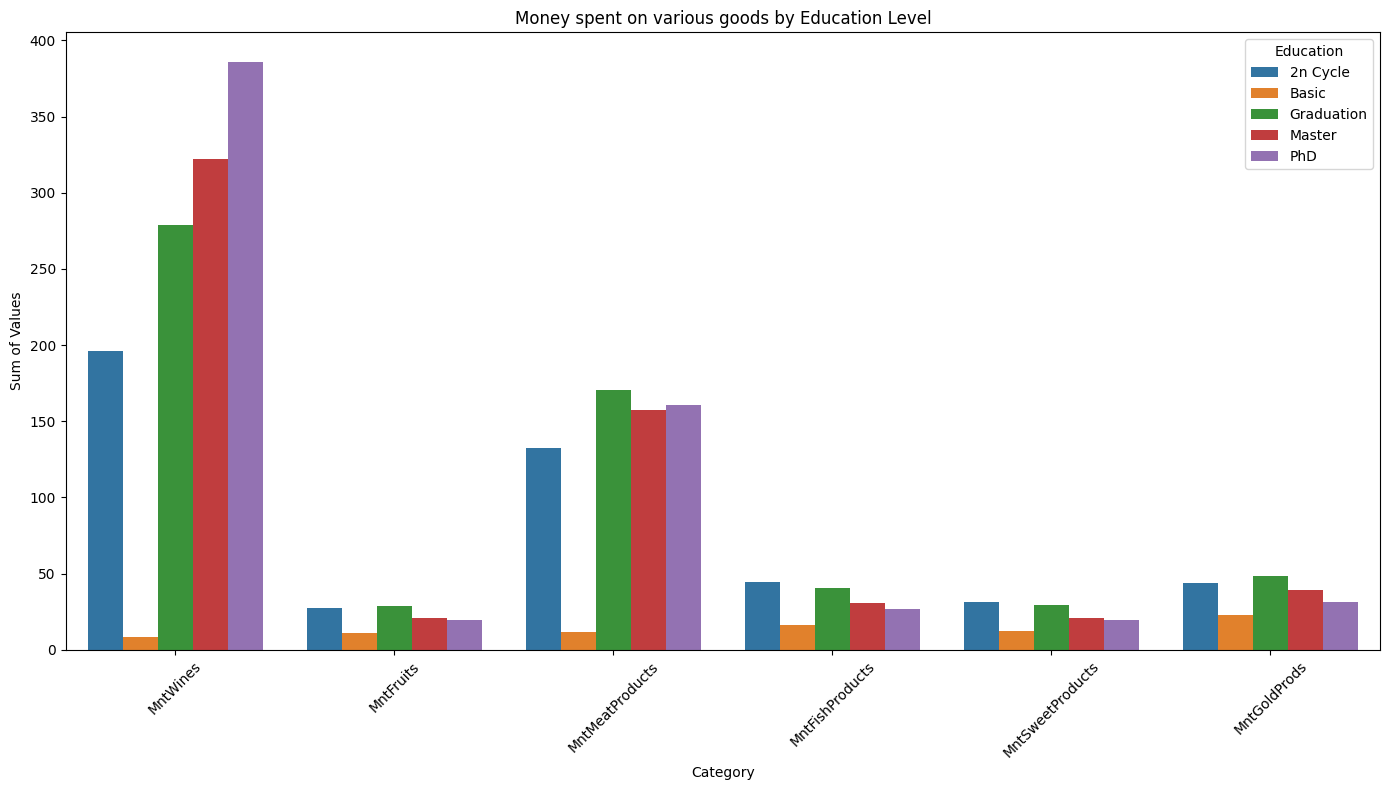

In [ ]:
# Select the relevant columns, excluding 'Dt_Customer'
columns = [
    'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds'
]

# Group by 'Education' and calculate the sum of each variable
df_education = df.groupby('Education')[columns].mean().reset_index()

# Melt the DataFrame to have a long-form DataFrame suitable for categorical plotting
melted_df_education = pd.melt(df_education, id_vars=['Education'],
                              var_name='Category', value_name='Value')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Value', hue='Education', data=melted_df_education)

# Customize the plot
plt.title('Money spent on various goods by Education Level')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Sum of Values')
plt.legend(title='Education')
plt.tight_layout()

# Show the plot
plt.show()

   - **Description**: This graph shows the purchasing behaviour of people with different education background.
   - **Observation**: The graph shows that the average money spent on wines by all the category is high with customer with phd leading the race. Graduates spent the most on all other products. Number of purchases made by each of the categories are nearly the same.

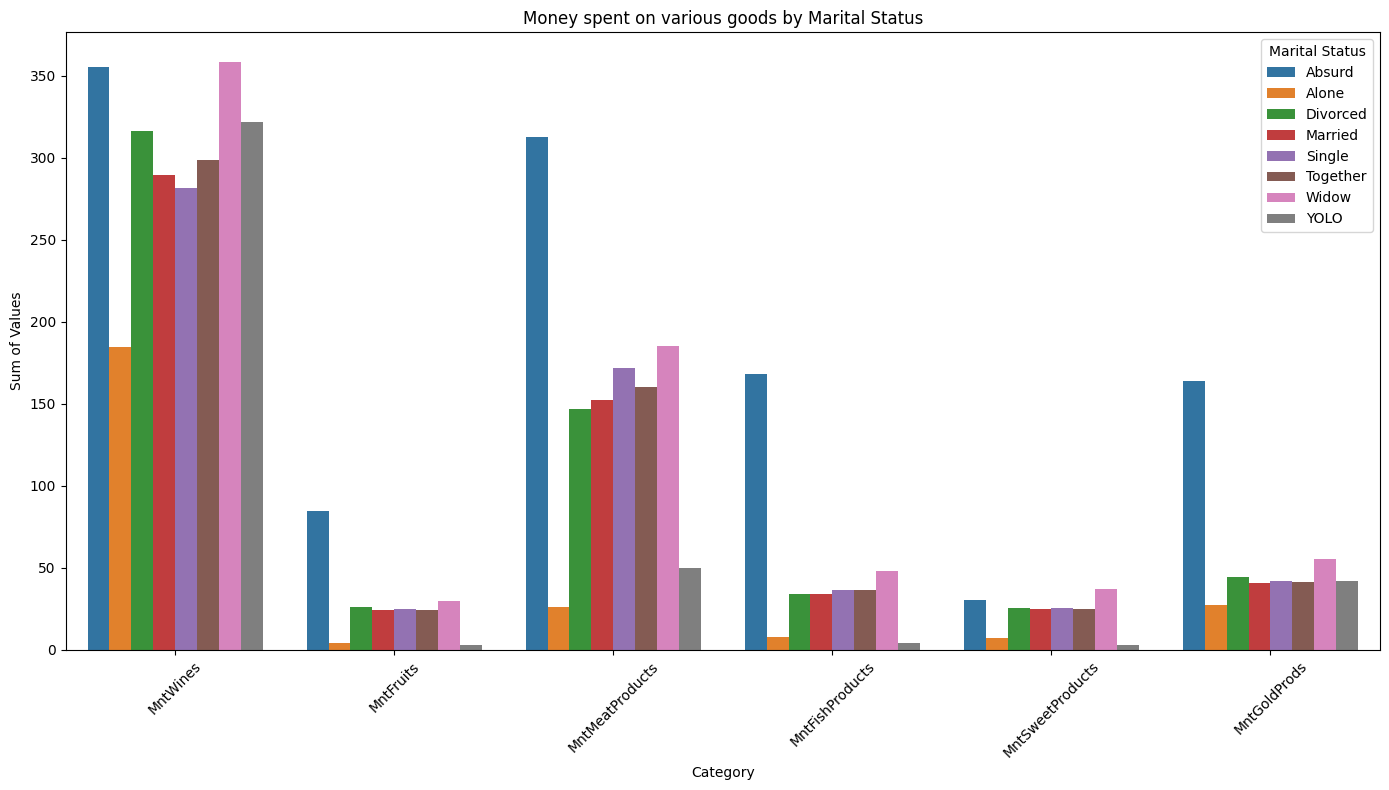

In [ ]:
# Select the relevant columns
columns = [
    'MntWines',
    'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntGoldProds'
]

# Group by 'Marital_Status' and calculate the sum of each variable
df_Marital_Status = df.groupby('Marital_Status')[columns].mean().reset_index()

# Melt the DataFrame to have a long-form DataFrame suitable for categorical plotting
melted_df_Marital_Status = pd.melt(df_Marital_Status, id_vars=['Marital_Status'],
                              var_name='Category', value_name='Value')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Value', hue='Marital_Status', data=melted_df_Marital_Status)

# Customize the plot
plt.title('Money spent on various goods by Marital Status')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Sum of Values')
plt.legend(title='Marital Status')
plt.tight_layout()

# Show the plot
plt.show()

   - **Description**: This graph shows the purchasing behaviour of people with different Marital Status.
   - **Observation**: The graph shows that absurd and widow category leading the wine race closely followed by others. In other goods also the trend is same.

####Scatter Plot of Income against MntWines, MntFruits, and MntMeatProducts

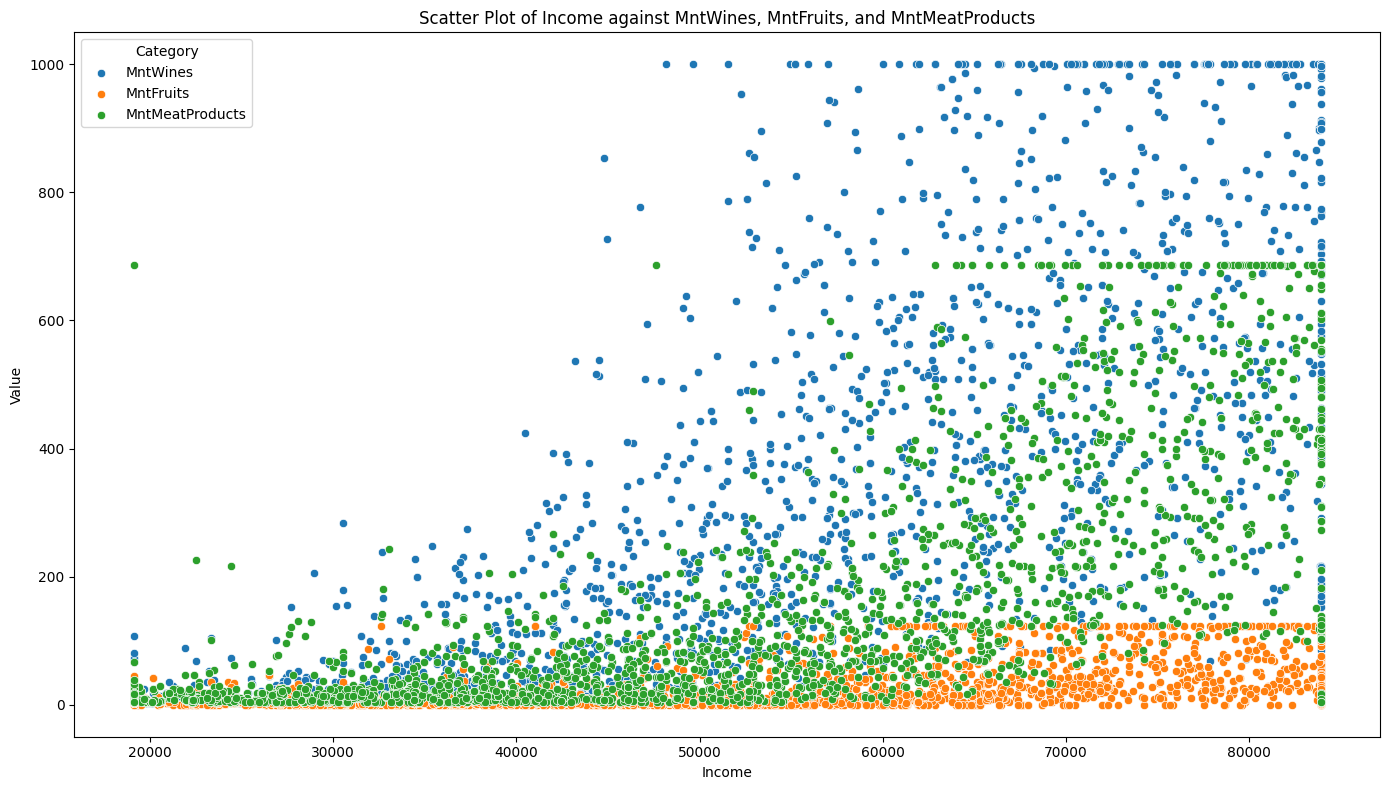

In [ ]:
# Specify the columns to plot
columns_to_plot = ['MntWines',  'MntFruits', 'MntMeatProducts']

# Plotting
plt.figure(figsize=(14, 8))

# Create scatter plots for each specified column against 'Income'
for column in columns_to_plot:
    sns.scatterplot(x='Income', y=column, data=df, label=column)

# Customize the plot
plt.title('Scatter Plot of Income against MntWines, MntFruits, and MntMeatProducts')
plt.xlabel('Income')
plt.ylabel('Value')
plt.legend(title='Category')
plt.tight_layout()

# Show the plot
plt.show()

   - **Description**: This graph shows the change in purchasing behaviour of people with raise in income.
   - **Observation**: It clearly shows the increase in money spent on three major categories of products with increase in income.

###Visualize the correlations between the numeric columns using a heatmap.

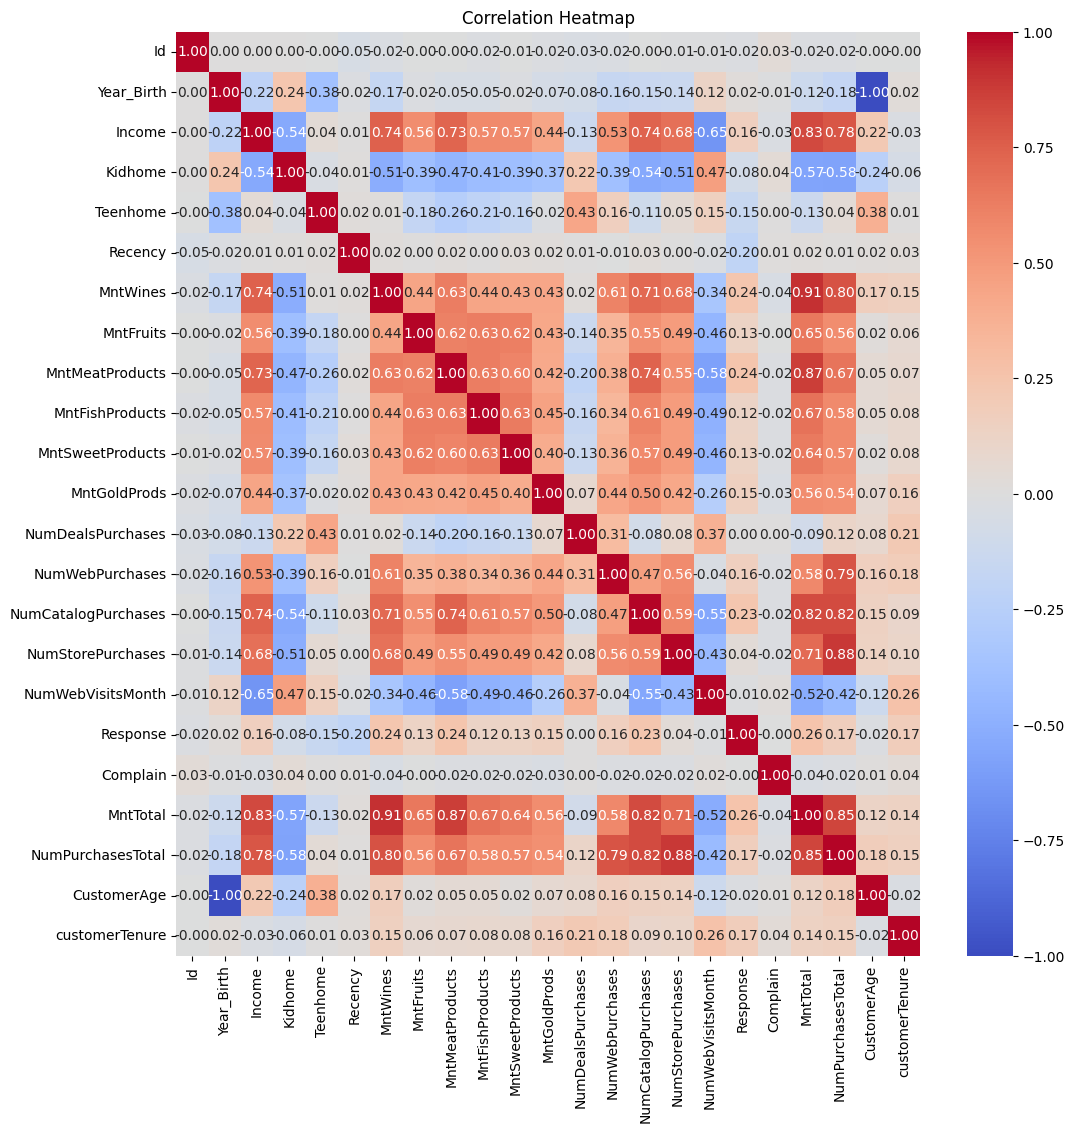

In [ ]:
# Compute the correlation matrix
corr = df.select_dtypes(include='number').corr()

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


   - **Description**: This graph shows the correlation heat map of the entire dataset.

###Visualization of mutual relationship using pairplot.

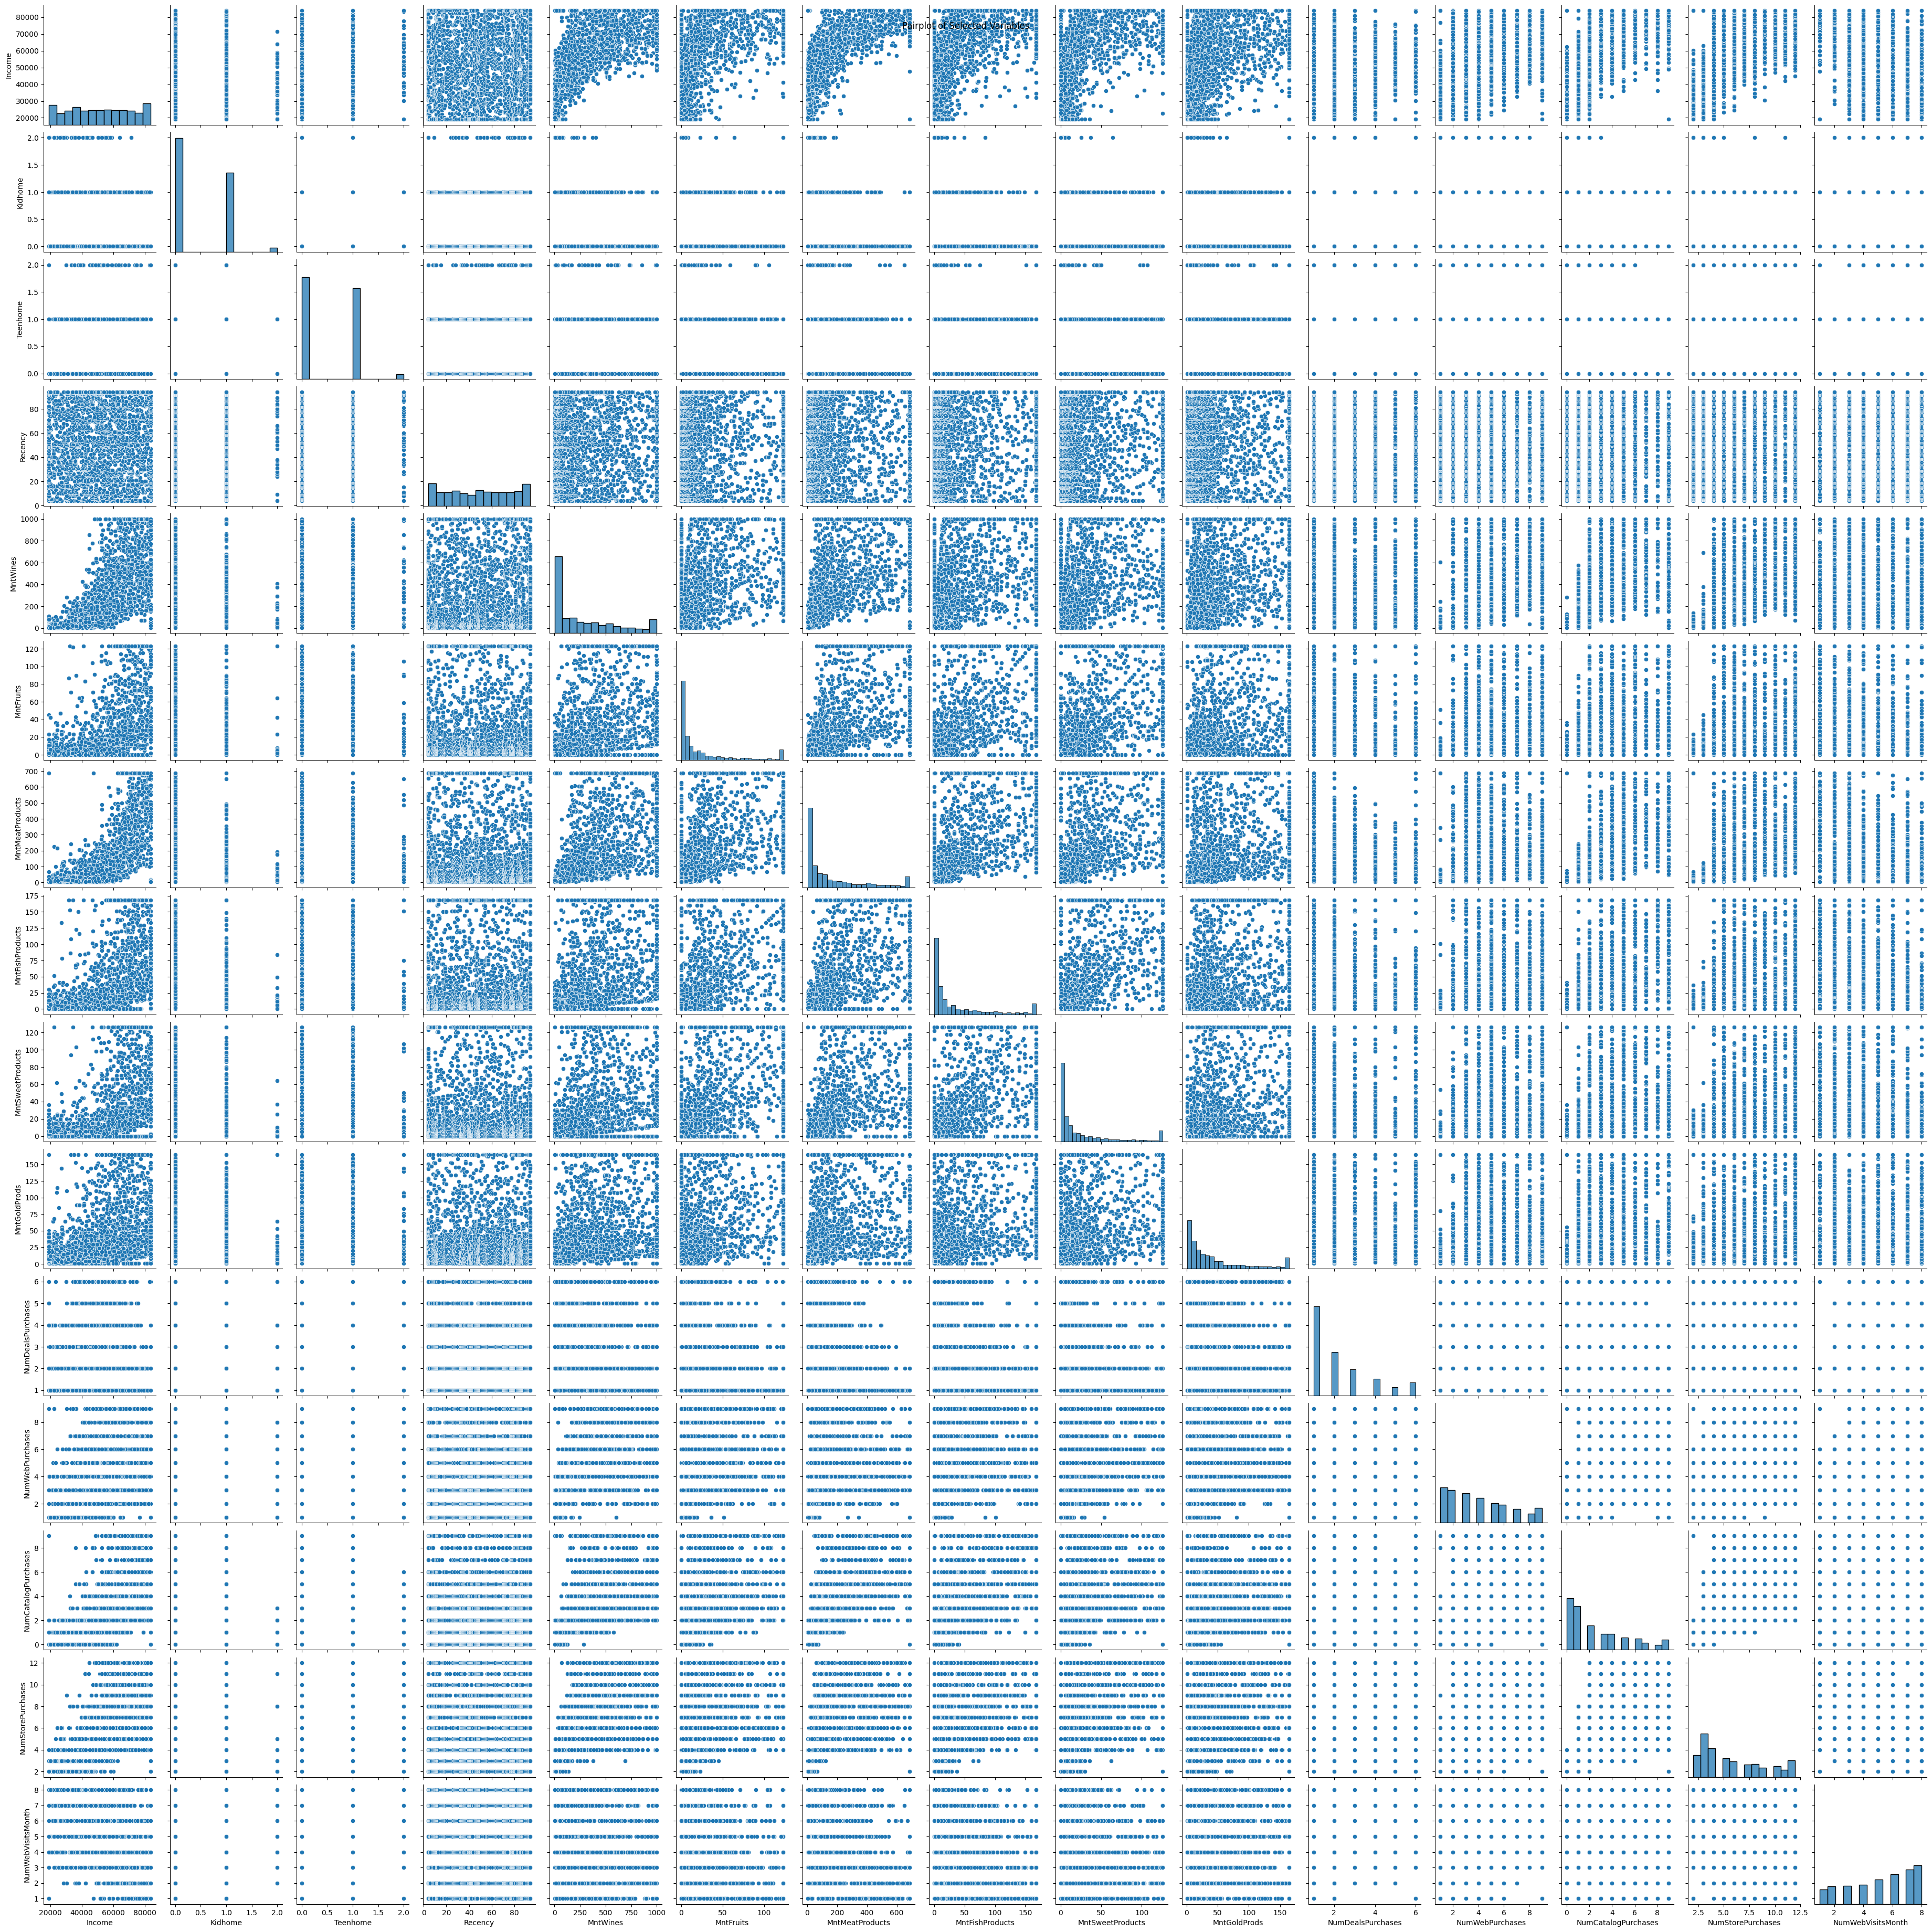

In [ ]:
columns_of_interest = ["Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",  "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

# Pairplot
sns.pairplot(df[columns_of_interest])
plt.suptitle('Pairplot of Selected Variables')
plt.show()

   - **Description**: This graph shows the pairplots of the entire dataset.

###Conclusion

The statistical analysis of customer purchase data has provided insightful probabilities and distributions that can guide store management in making informed decisions. Key findings indicate that:

1. **Stability in Purchases**: Most product categories show a high probability of minimal percentage changes in purchases over the next two years. This stability suggests that current customer behavior is likely to continue, providing a reliable basis for future planning.

2. **Identifying Areas for Improvement**: The data highlights specific areas where the store may be underperforming, such as slight decreases in purchases of certain products like fruits and fish. These insights can help management focus their efforts on targeted promotions and customer engagement strategies to boost sales in these categories.

3. **Recognizing Successes**: The analysis also underscores areas where the store has performed well, particularly in keeping the customer complains minimum and maintaining stable purchase levels for high-demand products like wines and meat products. Acknowledging these successes allows management to reinforce effective strategies and maintain customer satisfaction.

4. **Guiding Resource Allocation**: By understanding the probability distributions of purchases, the store can better allocate resources, optimize inventory management, and plan marketing campaigns to align with customer purchase behaviors.

5. **Marketing campaign**: Last but not the least we have to realy appreciate the efforts made in customer campaign to get so many positive response and there is a great possibility of marketing campaign being successfull if it is carried out once again.

In summary, the detailed statistical analysis equips store management with actionable insights to enhance performance, address areas needing improvement, and sustain successful practices. This data-driven approach will help the store continue to meet customer needs effectively and achieve long-term growth.